In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch



In [7]:
# Load Dataset
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Data Preprocessing
df.drop("CustomerID", axis=1, inplace=True)
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [10]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# K-Means Clustering

In [21]:
# Determine Optimal Clusters using Elbow Method & Silhouette Score
wcss = []
silhouette_scores = []
krange = range(2, 10)
for k in krange:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method')

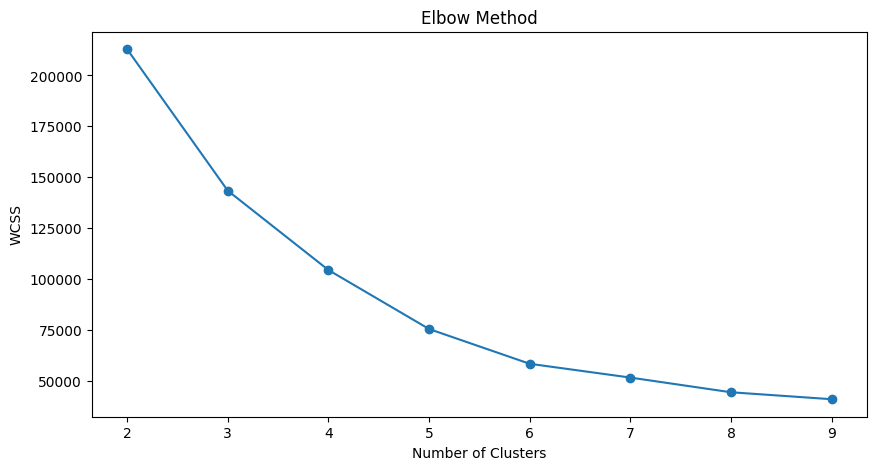

In [22]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(krange, wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")



In [23]:
silhouette_scores

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.44424291275274114,
 0.45205475380756516,
 0.43479758148661335,
 0.4294563708430266,
 0.4140946137007603]

In [24]:
silhouette_scores.index(max(silhouette_scores)) + 1

5

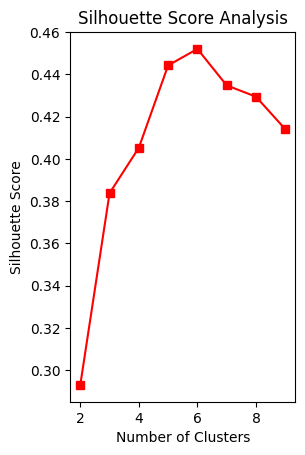

In [25]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(krange, silhouette_scores, marker="s", color="red")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()



In [26]:
# Optimal Clusters (based on analysis)
optimal_k = 5  



In [29]:
# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
optimal_label = kmeans.fit_predict(df)
labels = kmeans.labels_
df['Cluster'] = labels

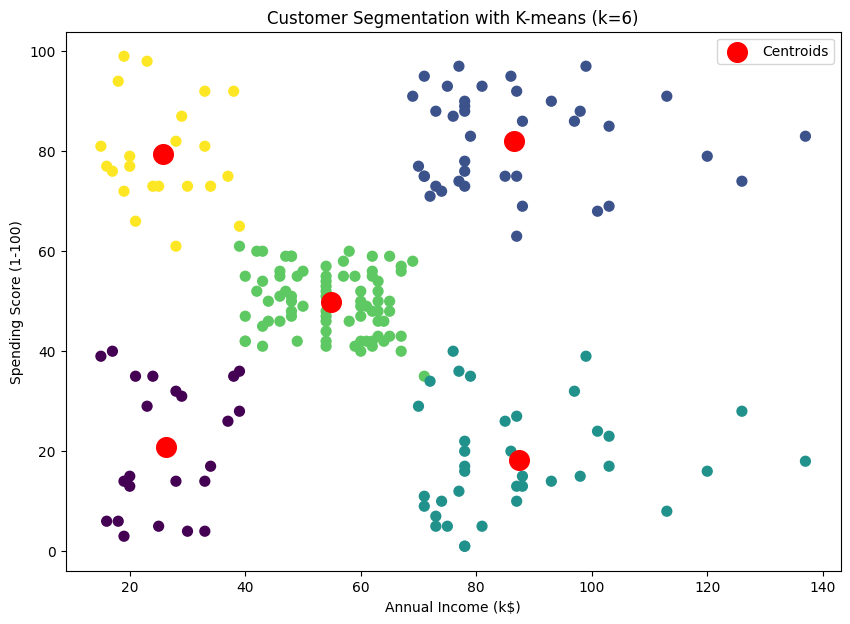

In [30]:
# Plotting the clusters
plt.figure(figsize=(10, 7))

# Choose two features for visualization (e.g., Annual Income and Spending Score)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=200, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with K-means (k=6)')
plt.legend()
plt.show()


# Hierarchical/Agglomerative Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

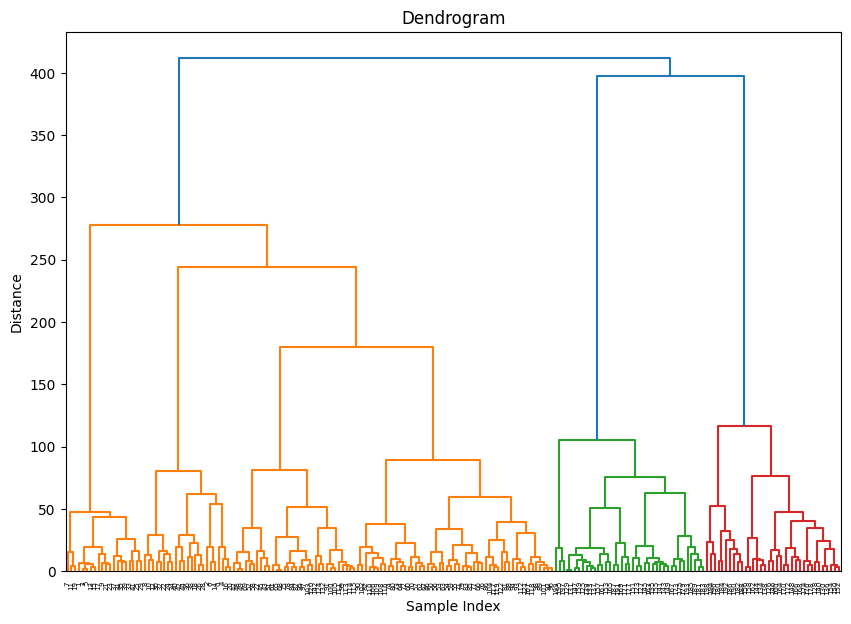

In [32]:
# Generate the linkage matrix
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

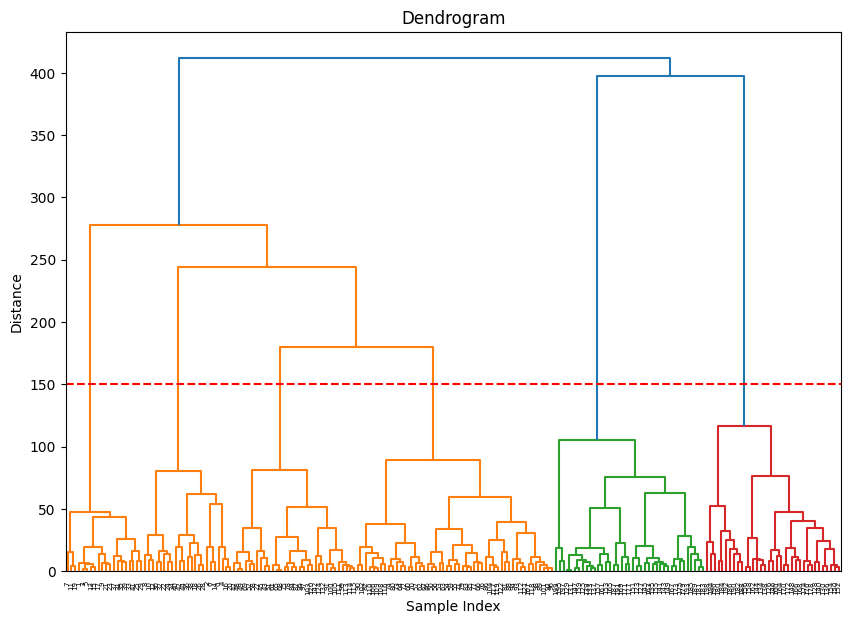

In [36]:
# Generate the linkage matrix
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=150, color='r', linestyle='--')
plt.show()

In [40]:
agg_clustering = AgglomerativeClustering(n_clusters=6)
y_pred = agg_clustering.fit_predict(df)
df['Agglomerative_Cluster'] = agg_clustering.labels_

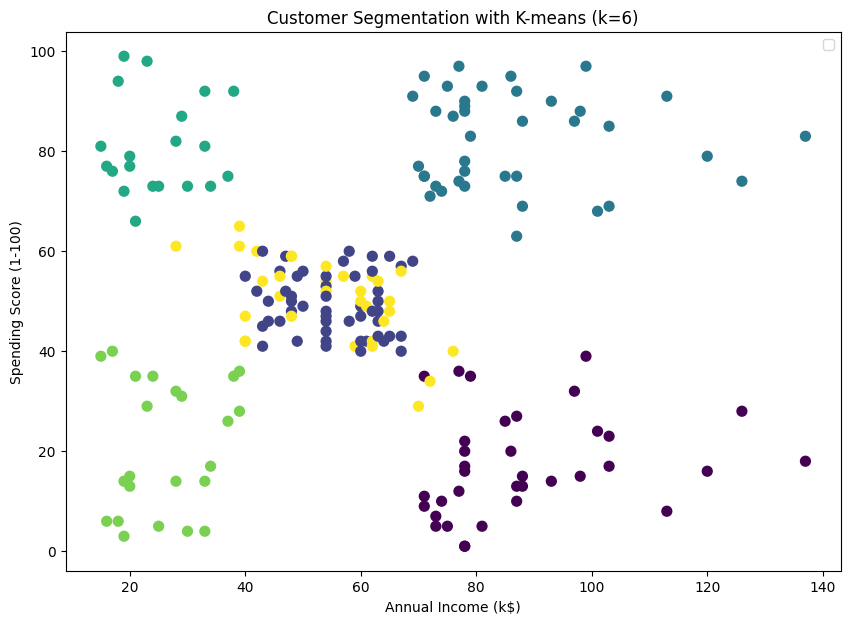

In [41]:
# Plotting the clusters
plt.figure(figsize=(10, 7))

# Choose two features for visualization (e.g., Annual Income and Spending Score)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Agglomerative_Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with K-means (k=6)')
plt.legend()
plt.show()